In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('seaborn-colorblind')

import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

# a)

Plot the (raw) data series and also plot SACF and SPACF for this data series

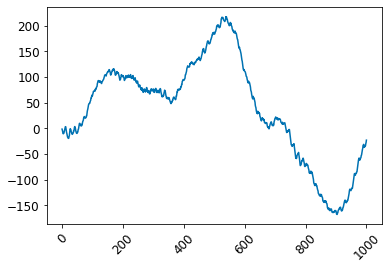

In [2]:
data = []

with open("SARIMAdata.txt", "r") as f:
    for line in f:
        data.append(float(line))

data = np.array(data)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.plot(data)

In [3]:
def dividing_data_into_subseries(data, k=2):
    data_k = []
    for i in range(len(data)-k):
        tmp = [ ]
        for j in range(k):
            tmp.append(data[j+i])
        tmp.append(data[k+i])
        data_k.append(tmp)
    
    return np.array(data_k).T

In [4]:
def get_autocorrelation_coeff(data, delta):
    
    data_k = dividing_data_into_subseries(data, k=delta)  
    denominator = (data**2).mean()
    nominator = (data_k[0]*data_k[-1]).mean()
    
    return nominator/denominator
    

In [5]:
def get_autocorrelation(p,data):
    
    autocorrelation_tab = []

    for delta in range(1,p+1):
        autocorrelation = get_autocorrelation_coeff(data, delta)
        autocorrelation_tab.append(autocorrelation)
    
    return autocorrelation_tab

### sample autocorrelation function (SACF)

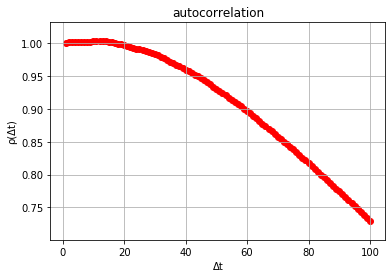

In [6]:
p=100

p_tab = list(range(1,p+1))
autocorrelation_tab = get_autocorrelation(p,data)

plt.title('autocorrelation')
plt.scatter(p_tab, autocorrelation_tab, color ='red')  
plt.ylabel(u'\u03C1(\u0394t)')
plt.xlabel(u'\u0394t')
plt.grid()

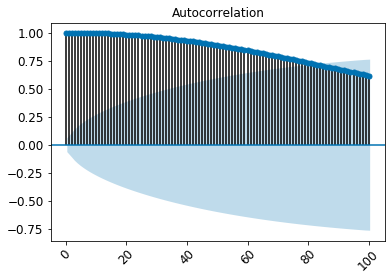

In [7]:
plot_acf(data, lags = p, unbiased=True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

###  Partial autocorrelation function (PACF) 

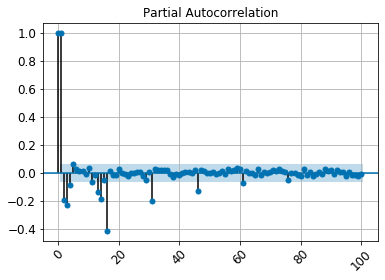

In [8]:
plot_pacf(data, lags = p, method = 'ywmle')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

# b) 

Try to detrend the data using the $\Delta n= (1−B)^n$ operator, where $B$ is the "backshift" operator $ By_t= y_{t−1} $ and $n= 1,2,...$ (for the linear, quadratic, ... trend,  respectively). 
Plot again the detrended data and its SACF and SPACF.

In [9]:
df = pd.DataFrame(data, columns = ['y_t'])

df['y_(t1)'] = df['y_t'].shift(-1)
df['y_(t2)'] = df['y_t'].shift(-2)
df['y_(t3)'] = df['y_t'].shift(-3)
df.dropna(inplace = True)

df['Delta_1'] = df['y_(t3)'] - df['y_(t2)']
df['Delta_2'] = df['y_(t3)'] - 2*df['y_(t2)']+ df['y_(t1)']
df['Delta_3'] = df['y_(t3)'] - 3*df['y_(t2)']+ 3*df['y_(t1)']- df['y_t']

df.head(6)

,y_t,y_(t1),y_(t2),y_(t3),Delta_1,Delta_2,Delta_3
0,-1.538553,-3.592503,-6.659171,-8.904765,-2.245593,0.821075,1.833793
1,-3.592503,-6.659171,-8.904765,-10.665135,-1.760371,0.485223,-0.335852
2,-6.659171,-8.904765,-10.665135,-9.393670,1.271465,3.031836,2.546614
3,-8.904765,-10.665135,-9.393670,-9.477606,-0.083935,-1.355401,-4.387237
4,-10.665135,-9.393670,-9.477606,-6.621387,2.856218,2.940154,4.295554
5,-9.393670,-9.477606,-6.621387,-3.287828,3.333559,0.477341,-2.462813


### Plots $\Delta n$  for n=1,2,3

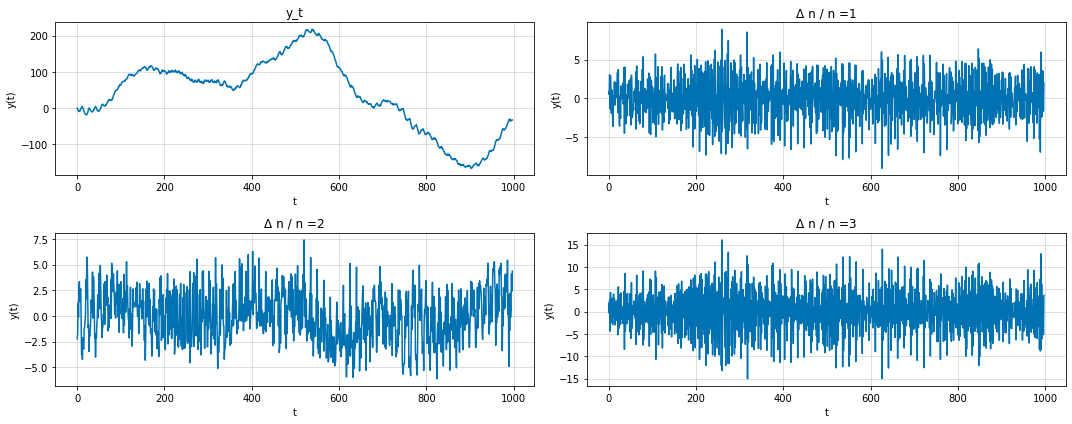

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(15,6), sharex = False)

for row in axs:
    for ax in row:
        ax.grid(alpha = 0.5)
        ax.set_xlabel('t')
        ax.set_ylabel('y(t)')

axs[0][0].plot(df['y_t'])
axs[1][0].plot(df['Delta_1'])
axs[0][1].plot(df['Delta_2'])
axs[1][1].plot(df['Delta_3'])


axs[0][0].set_title('y_t')
axs[0][1].set_title(u'\u0394 n / n =1')
axs[1][0].set_title(u'\u0394 n / n =2')
axs[1][1].set_title(u'\u0394 n / n =3')

fig.tight_layout()

### autocorrelation for $\Delta n$

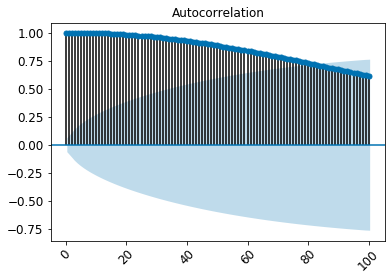

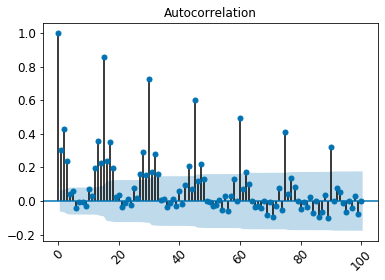

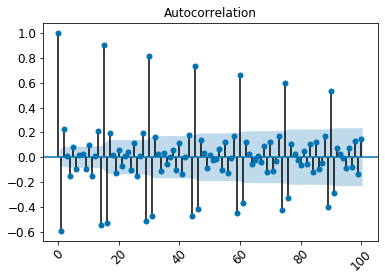

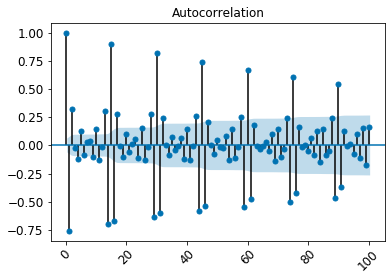

In [11]:
plot_acf(df['y_t'], lags = p, unbiased=True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_1'], lags = p, unbiased=True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_2'], lags = p, unbiased=True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_3'], lags = p, unbiased=True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### partial autocorrelation $\Delta n$

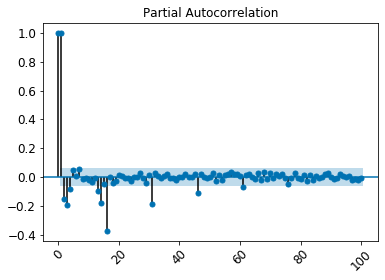

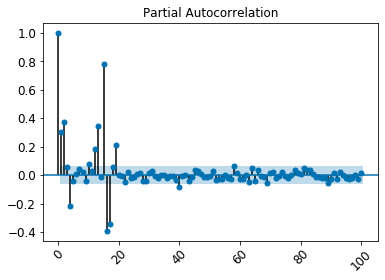

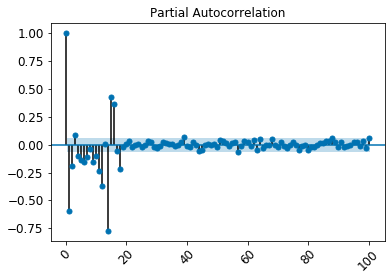

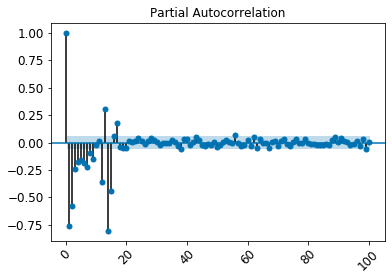

In [12]:
plot_pacf(df['y_t'], lags = p, method = 'ywmle')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df['Delta_1'], lags = p, method = 'ywmle')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df['Delta_2'], lags = p, method = 'ywmle')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df['Delta_3'], lags = p, method = 'ywmle')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Based on the (partial) autocorrelation, trend is removed for $n\geq 1$. For further analysis we take $\Delta n$ for $n=1$

# c)
Based on the bahaviour of SACF and SPACF above try to find periodicity of the data and cancel it by aplying the operator $\Delta p=(1−B^p)$ (where $p$ is the period) to the (detrended) data series

In [13]:
detrended_data = np.array(df['Delta_1'])
df_detrended = pd.DataFrame(detrended_data, columns = ['y_t'])

df_detrended['y_(t1)'] = df_detrended['y_t'].shift(-1)
df_detrended['y_(t2)'] = df_detrended['y_t'].shift(-2)
df_detrended['y_(t10)'] = df_detrended['y_t'].shift(-10)
df_detrended['y_(t14)'] = df_detrended['y_t'].shift(-14)
df_detrended['y_(t15)'] = df_detrended['y_t'].shift(-15)
df_detrended['y_(t16)'] = df_detrended['y_t'].shift(-16)

df_detrended.dropna(inplace = True)

df_detrended['Delta_1'] = df_detrended['y_(t1)'] - df_detrended['y_t']
df_detrended['Delta_2'] = df_detrended['y_(t2)'] - df_detrended['y_t']
df_detrended['Delta_10'] = df_detrended['y_(t10)'] - df_detrended['y_t']
df_detrended['Delta_14'] = df_detrended['y_(t14)'] - df_detrended['y_t']
df_detrended['Delta_15'] = df_detrended['y_(t15)'] - df_detrended['y_t']
df_detrended['Delta_16'] = df_detrended['y_(t16)'] - df_detrended['y_t']

df_detrended.head(6)

,y_t,y_(t1),y_(t2),y_(t10),y_(t14),y_(t15),y_(t16),Delta_1,Delta_2,Delta_10,Delta_14,Delta_15,Delta_16
0,-2.245593,-1.760371,1.271465,-3.776604,-3.016050,-3.228688,-1.193939,0.485223,3.517059,-1.531011,-0.770457,-0.983094,1.051654
1,-1.760371,1.271465,-0.083935,-3.475717,-3.228688,-1.193939,-1.126277,3.031836,1.676436,-1.715347,-1.468317,0.566432,0.634094
2,1.271465,-0.083935,2.856218,-4.261620,-1.193939,-1.126277,-0.523359,-1.355401,1.584753,-5.533085,-2.465404,-2.397742,-1.794824
3,-0.083935,2.856218,3.333559,-2.136829,-1.126277,-0.523359,0.199432,2.940154,3.417495,-2.052893,-1.042342,-0.439423,0.283367
4,2.856218,3.333559,1.411047,-3.016050,-0.523359,0.199432,3.526334,0.477341,-1.445171,-5.872269,-3.379577,-2.656786,0.670115
5,3.333559,1.411047,2.468733,-3.228688,0.199432,3.526334,1.679568,-1.922512,-0.864826,-6.562247,-3.134127,0.192774,-1.653992


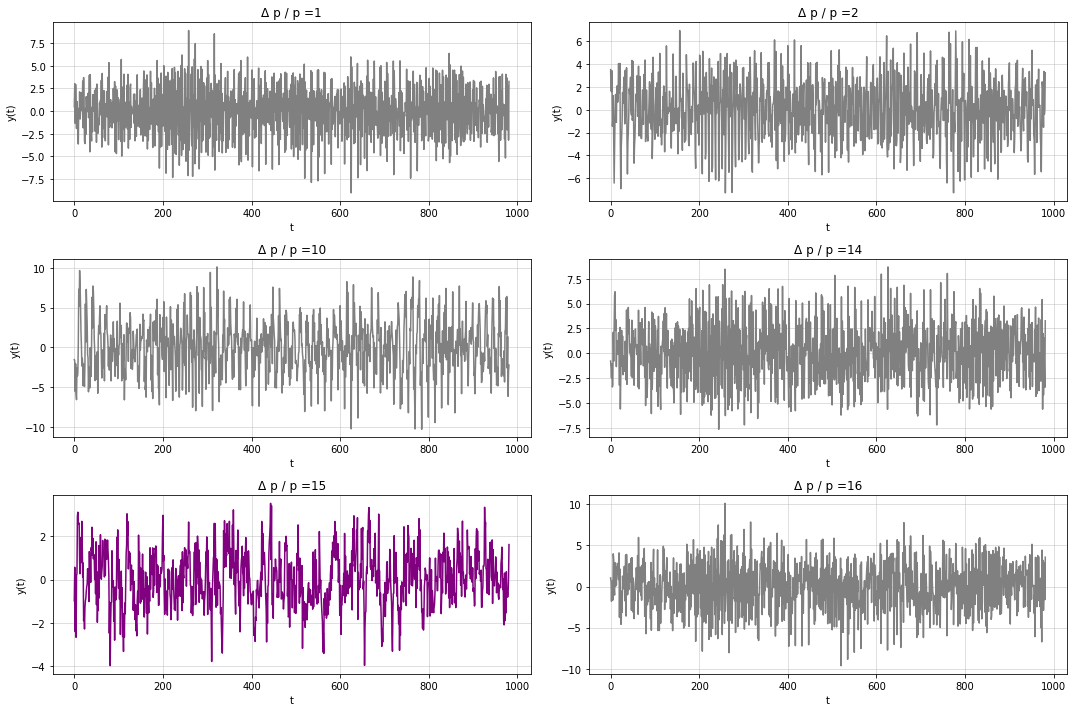

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(15,10), sharex = False)

for row in axs:
    for ax in row:
        ax.grid(alpha = 0.5)
        ax.set_xlabel('t')
        ax.set_ylabel('y(t)')
        
axs[0][0].plot(df_detrended['Delta_1'], color = 'gray')
axs[0][1].plot(df_detrended['Delta_2'], color = 'gray')
axs[1][0].plot(df_detrended['Delta_10'], color = 'gray' )
axs[1][1].plot(df_detrended['Delta_14'], color = 'gray')
axs[2][0].plot(df_detrended['Delta_15'], color = 'purple')
axs[2][1].plot(df_detrended['Delta_16'], color = 'gray')

axs[0][0].set_title(u'\u0394 p / p =1')
axs[0][1].set_title(u'\u0394 p / p =2')
axs[1][0].set_title(u'\u0394 p / p =10')
axs[1][1].set_title(u'\u0394 p / p =14')
axs[2][0].set_title(u'\u0394 p / p =15')
axs[2][1].set_title(u'\u0394 p / p =16')

fig.tight_layout()

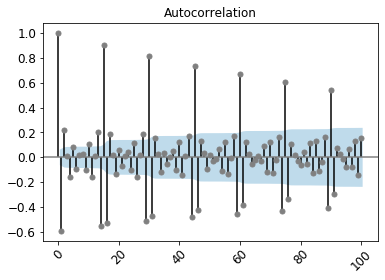

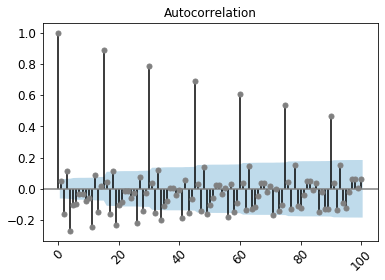

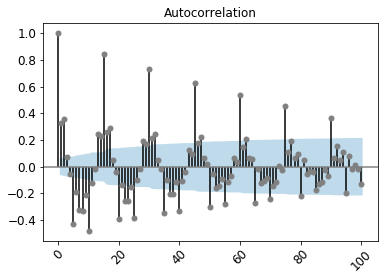

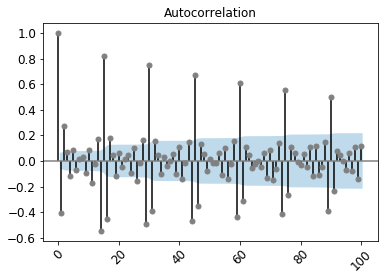

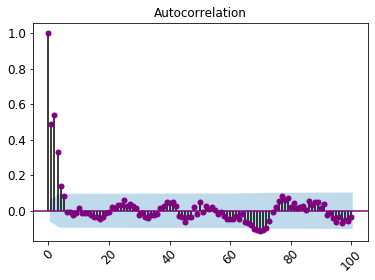

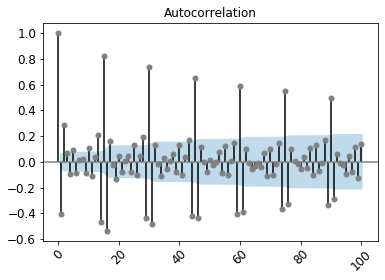

In [15]:
plot_acf(df_detrended['Delta_1'], lags = p, unbiased=True, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df_detrended['Delta_2'], lags = p, unbiased=True, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df_detrended['Delta_10'], lags = p, unbiased=True, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df_detrended['Delta_14'], lags = p, unbiased=True, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df_detrended['Delta_15'], lags = p, unbiased=True, color ='purple')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df_detrended['Delta_16'], lags = p, unbiased=True, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

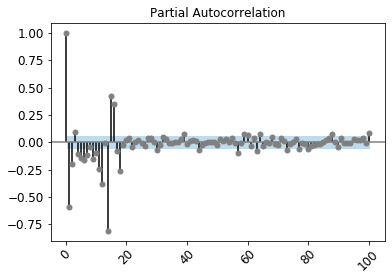

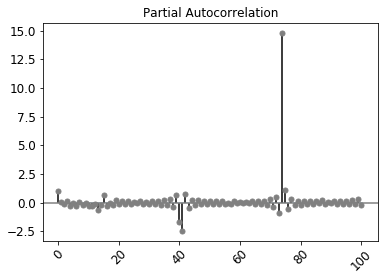

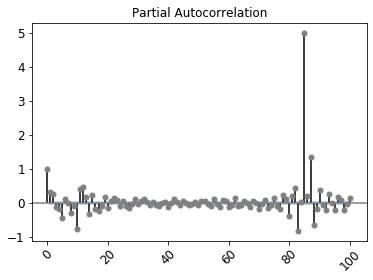

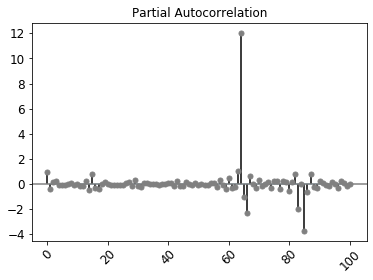

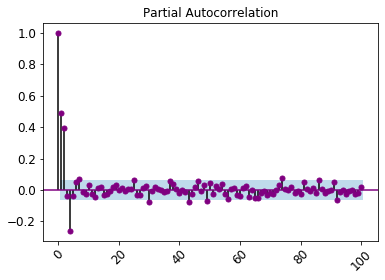

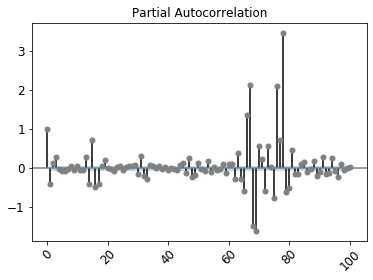

In [16]:
plot_pacf(df_detrended['Delta_1'], lags = p, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df_detrended['Delta_2'], lags = p, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df_detrended['Delta_10'], lags = p, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df_detrended['Delta_14'], lags = p, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df_detrended['Delta_15'], lags = p, color='purple')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(df_detrended['Delta_16'], lags = p, color ='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Based on the above plots and (partial) autocorrelation plots we may assume that the seasonality of the given process is $s = 15$

# d)
Check if now the data seem to be stationary (make plots of data,SACF and PACF). If so, try to fit an ARMA(p,q) model to the stationary data. You can fit it "by  hand" (using  any method).

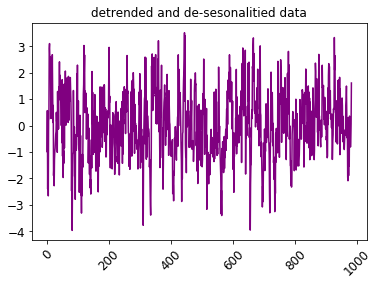

In [17]:
stationary_data = np.array(df_detrended['Delta_15'])

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.title('detrended and de-sesonalitied data')
plt.plot(stationary_data, color = 'purple')

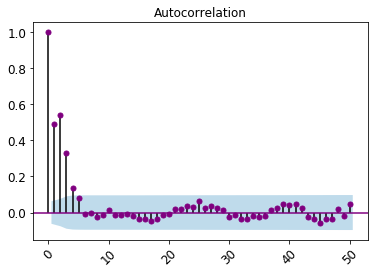

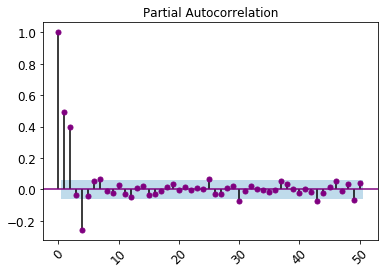

In [18]:
plot_acf(stationary_data, lags = 50, color ='purple')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


plot_pacf(stationary_data, lags = 50, method = 'ywmle', color ='purple')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### Fitting ARMA(p,q) parameters:  brute force method

In [19]:
def check_for_ARMA(dta, p_max, q_max):
    
    aic = pd.DataFrame(np.zeros((p_max, q_max), dtype=float))
    bic = pd.DataFrame(np.zeros((p_max, q_max), dtype=float))

    for p in range(p_max):
        for q in range(q_max):
            if p == 0 and q == 0:
                continue
            try:
                mod = sm.tsa.ARMA(dta, (p,q)).fit()
                aic.iloc[p,q] = mod.aic
                bic.iloc[p,q] = mod.bic

            except:
                aic.iloc[p,q] = np.nan
                bic.iloc[p,q] = np.nan

    return aic, bic

In [20]:
aic, bic = check_for_ARMA(stationary_data, 8,8)

In [21]:
aic

,0,1,2,3,4,5,6,7
0,0.000000,3121.414085,2883.964991,2786.558951,2776.197036,2759.859177,2759.230023,2760.748800
1,2993.874463,2904.104194,2759.531219,2760.785492,2762.750864,2759.422782,2761.095922,2761.884872
2,2829.352262,2830.690012,2760.785612,2760.580913,2762.500622,2759.513955,2763.331850,2758.686371
3,2829.822751,2809.766897,2762.668326,2762.451596,2763.527109,2760.495566,2763.270972,2760.627119
4,2763.486663,2764.402487,2759.755975,2761.239230,2763.180891,2762.544137,2763.096287,NaN
5,2763.888881,2765.247829,2761.376258,2763.159397,2765.151716,2762.855972,2761.353132,2763.196281
6,2763.121653,2762.906776,2763.366550,2765.241870,2764.395350,2756.629488,2765.324456,2757.040264
7,2760.443927,2762.363914,2760.739563,2767.067318,2769.194259,2763.260941,2765.164456,2766.884745


In [36]:
bic

,0,1,2,3,4,5,6,7
0,0.000000,3136.082859,2903.523356,2811.006907,2805.534584,2794.086316,2798.346753,2804.755122
1,3008.543237,2923.662560,2783.979176,2790.123040,2796.978003,2798.539512,2805.102244,2810.780785
2,2848.910627,2855.137969,2790.123160,2794.808052,2801.617353,2803.520276,2812.227763,2812.471875
3,2854.270708,2839.104445,2796.895466,2801.568326,2807.533431,2809.391479,2817.056477,2819.302214
4,2792.824211,2798.629627,2798.872706,2805.245551,2812.076805,2816.329642,2821.771383,NaN
5,2798.116020,2804.364559,2805.382579,2812.055310,2818.937220,2821.531068,2824.917819,2831.650560
6,2802.238384,2806.913098,2812.262463,2819.027375,2823.070446,2820.194175,2833.778734,2830.384133
7,2804.450249,2811.259827,2814.525068,2825.742414,2832.758946,2831.715219,2838.508326,2845.118206


In [30]:
p = 6
q = 5

model = sm.tsa.ARMA(stationary_data, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

aic = 2756.6294883777073	 bic = 2820.1941753863152


 parameters: [ 0.03747872  0.48944801 -0.56304202 -0.02537633  0.32499946 -0.01869447
 -0.13383007 -0.20155135  1.0553327   0.29869201  0.01640507  0.22729577]


In [37]:
p = 2
q = 2

model = sm.tsa.ARMA(stationary_data, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

aic = 2760.785611714453	 bic = 2790.1231595645795


 parameters: [ 0.03586934  0.64866779 -0.05760555 -0.35864322  0.48898433]


## Results:

A heuristic analisys based on hand-waving gives the following results:
* trend: $n=1$
* seasonalisty $s=15$
* ARMA(p,q) parameters: $p=6$, $q=5$ (based on AIC) or $p=2$, $q=2$ (based on BIC)